In [4]:
import math
import random
import electric_vehicle
import numpy as np
from matplotlib import pyplot as plt

In [5]:
import math
import random
import electric_vehicle
import numpy as np
from matplotlib import pyplot as plt

# ----------- Globals & Constants -------------

# --- poissonStuff ---
avgArrivalRate = 10.0 # cars per minute

# sets the arrival rate to a specificed value. Used for mass simulation
def setArrivalRate( newArrivalRate ):
    global avgArrivalRate
    avgArrivalRate = newArrivalRate

# --- charging stuff ---
# chargeRateMu
# chargeRateSigma

# chargeNeeded - the charge needed at the end 
chargeNeededMu = .9 #kwh in $
chargeNeededSigma = .1 #kwh in %

currentChargeMu = .4 #kwh in %
currentChargeSigma = .15 #kwh in %

uniformMaxCapacity = 100 #kwh
uniformChargeRate = 20 #kw

# just some values of common cars.. Volt: 16, Leaf: 24, Model S: 60 in kw
# more of some vs others to reprsent realistic distribution
batteryCapacities = [ 16, 16, 16, 16, 24, 24, 24, 24, 24, 16, 16, 16, 16, 16, 16, 24, 60 ]

# ------------ Poisson Generator ------------

# the main function for generating an interval on which to run an algorithmn
# will create a 2-level array, the top level being the length of the interval
# level 2 contains an array of the vehicle objects that will arrive during that minute

def vehicleGen( arrayOfArrivalsPerMin ):
    vehicles = []

    for minute, arrivalesDuringMin in enumerate( arrayOfArrivalsPerMin ):
        if arrivalesDuringMin != 0 :
            vehiclesDuringMin = []

            for i in range( 0, arrivalesDuringMin ):
                depart = minute + random.randint( 60 , 180 )
                batteryCapacity = random.choice( batteryCapacities )
                chargeNeeded = random.gauss( ( chargeNeededMu * batteryCapacity ) , ( chargeNeededSigma * batteryCapacity ) )
                currentCharge = random.gauss( ( currentChargeMu * batteryCapacity ) , ( currentChargeSigma * batteryCapacity ) )
                chargeRate = uniformChargeRate
                vehiclesDuringMin.append(electric_vehicle.EV( minute, depart, chargeNeeded, currentCharge, chargeRate, batteryCapacity ) )
            
            vehicles.append( vehiclesDuringMin )

        else:
            vehicles.append( [] )

    return vehicles


In [6]:
#Generate random arrival rates and simulate EVs through arrival rate
l=np.random.poisson(1, size=20)
b=(vehicleGen(l))


In [7]:
#remove empty fields
list2 = [x for x in b if x]
list2[2][0]
l=sum(list2,[])
l

In [6]:
p=[]
for i in range (len(list2)):   
    p.append((list2[i][0].chargeNeeded))
sorted(p)
len(p)

11

Text(0.5, 1.0, 'Distribution of chargeNeeded values')

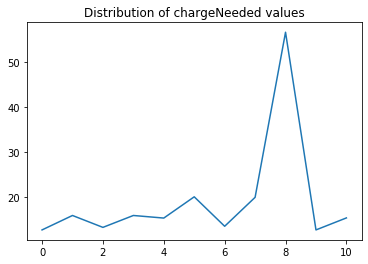

In [7]:
#PoissonGen works!
plt.plot(range(0,len(list2)),p)
plt.title('Distribution of chargeNeeded values')

In [8]:
electricityPrice = .5   # in dollars
def calcProfit():
    profit = 0
    # add up profit from each vehicle
    for vehicle in l:
        profit += vehicle.timeToCharge * electricityPrice * vehicle.chargeRate / 60.0
    return profit

In [9]:
calcProfit()

77.83333333333333